In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pickle
import os

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

In [3]:
metric = 'kappa'

In [4]:
xs = []
ys = []
zs = []

possibleFeaturesDim = [2,3,5,8,13,22,36,60,100,200]
possibleFeaturesLayers = [1,2,3,5,8,13,22,36,60]
allCombinations = itertools.product(possibleFeaturesDim, possibleFeaturesLayers)

valuesDict = {}

minValue = {
    'featuresDim':0,
    'featuresLayers':0.,
    metric:100,
}

maxValue = {
    'featuresDim':0,
    'featuresLayers':0.,
    metric:0,
}

       
for comb in allCombinations:
    currFile = "filesFolds-MMI-cnn{}x{}-1hidd/output/0/evaluationSede1-10.p".format(comb[1], comb[0])
    if comb[0] not in valuesDict:
        valuesDict[comb[0]] = {}
        
    if os.path.isfile(currFile):
        output = pickle.load(open(currFile, 'rb'))
        xs.append(comb[0])
        ys.append(comb[1])
        zs.append(output[metric])

        if output[metric] < minValue[metric]:
            minValue['featuresDim'] = comb[0]
            minValue['featuresLayers'] = comb[1]
            minValue[metric] = output[metric]

        if output[metric] > maxValue[metric]:
            maxValue['featuresDim'] = comb[0]
            maxValue['featuresLayers'] = comb[1]
            maxValue[metric] = output[metric]

        valuesDict[comb[0]][comb[1]] = output[metric]
    else:
        valuesDict[comb[0]][comb[1]] = -1


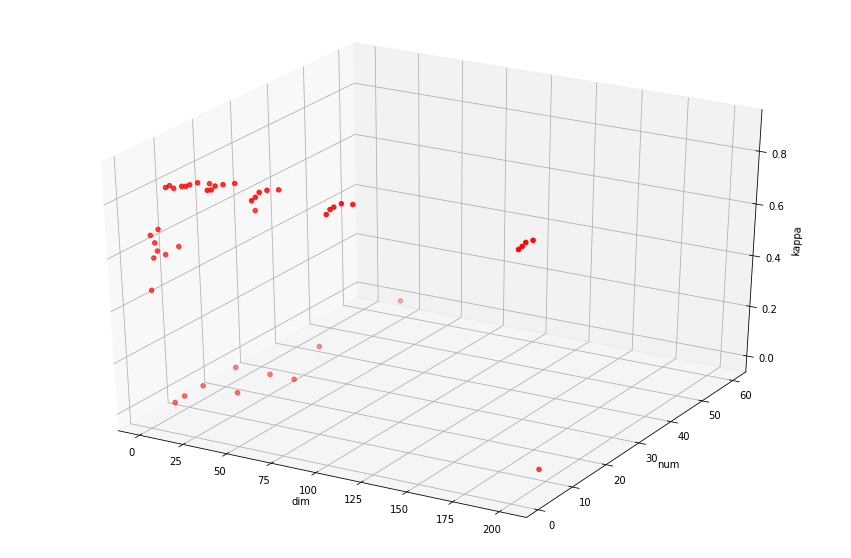

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, c='r', marker='o')
ax.set_xlabel('dim')
ax.set_ylabel('num')
ax.set_zlabel(metric)
plt.show()

In [6]:
print(maxValue)

{'featuresDim': 60, 'featuresLayers': 3, 'kappa': 0.8905446751313046}


In [7]:
print(minValue)

{'featuresDim': 2, 'featuresLayers': 8, 'kappa': 0.0}


In [8]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ['dim\\num'] + possibleFeaturesLayers
for z in possibleFeaturesDim:
    x.add_row([z] + ["{:.3f}".format(valuesDict[z][l]) for l in possibleFeaturesLayers])

print(x)

+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| dim\num |   1    |   2    |   3    |   5    |   8    |   13   |   22   |   36   |   60   |
+---------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|    2    | 0.469  | 0.583  | 0.602  | 0.574  | 0.000  | 0.000  | 0.000  | -1.000 | -1.000 |
|    3    | 0.677  | 0.641  | 0.684  | 0.000  | 0.583  | -1.000 | -1.000 | -1.000 | -1.000 |
|    5    | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 |
|    8    | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 |
|    13   | 0.865  | 0.865  | 0.848  | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 | -1.000 |
|    22   | 0.881  | 0.873  | 0.872  | 0.865  | 0.841  | 0.000  | 0.000  | 0.000  | 0.000  |
|    36   | 0.883  | 0.877  | 0.884  | 0.875  | 0.859  | 0.723  | 0.000  | -1.000 | -1.000 |
|    60   | 0.875  | 0.880  | 0.891  | 0.884  | 0.864  | -1.000 | -1.0